# McMaster Drone Club - Tensorflow Workshop - CNN for Object Detection

Resources
- General Overview and Visualization: https://www.youtube.com/watch?v=pj9-rr1wDhM&ab_channel=Futurology%E2%80%94AnOptimisticFuture
- More Specific: https://www.youtube.com/watch?v=YRhxdVk_sIs&ab_channel=deeplizard





In [ ]:
#install tensorflow

import tensorflow as tf

In [ ]:
#additional imports

import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model


# Data Processing

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
9
0
0
3
0
2
7
2
5
5
0
9
5
5
7
9
1
0
6
4
3
1
4
8
4
3
0
2
4
4
5
3
6
6
0
8
5
2
1
6
6
7
9
5
9
2
7
3
0
3
3
3
7
2
2
6
6
8
3
3
5
0
5
5
0
2
0
0
4
1
3
1
6
3
1
4
4
6
1
9
1
3
5
7
9
7
1
7
9
9
9
3
2
9
3
6
4
1
1
8


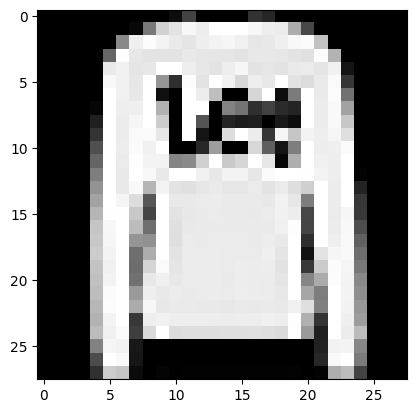

In [ ]:
#load in data ---> fashion_mnist (a popular clothing dataset)

the_data = tf.keras.datasets.fashion_mnist.load_data()
(x_train, y_train), (x_test, y_test) = the_data

print(x_train.shape, y_train.shape)
for i in range(100):
  print(y_train[i])

plt.imshow(x_test[1].squeeze(), cmap='gray')

labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n") # 0-9

In [ ]:
print(x_train[0].shape)

print(x_train[0]) # represents 1 image --> each image is 28x28 pixels, thus this is represented by a 2D array thats 28 by 28 --> each value is the Black/White level (0-255 since its a Greyscale image)

print(y_train[0]) # corresponding Clothing Type (from 0-9) (score of 0 = T-shirt, 3 = Dress, ...)
# X is input, Y is allocating output
# Picture of a dress, should have Output of 'Dress' (3) label/prediction

# x_train, x_test = x_train / 255.0, x_test / 255.0 # normalize it --> models work better with values between 0-1
# print(x_train[0])

# print("x_train.shape:", x_train.shape) # 60000 images, each represented by a 28x28 array


(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 2

In [ ]:
# expand data by adding extra dimension
# if was COLOURED images, dimension = 3 but since BW the dimension = 1

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28, 1)


In [ ]:
K = len(set(y_train)) # set only gets unique values in y_train (number for possible clothing types)

# Create The Model

In [ ]:
# Build CNN model

# i = Input(shape=x_train[0].shape) # define input format
i = Input(shape=(28, 28, 1)) # define input format
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i) # convolutional layers (feature gathering) (analyze a smaller portion of image each time) (first detect lines/edges later can detect complex shapes like circles/stars/faces/...)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x) # Strides are a downsampling technique similar to Pooling
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x) # fully connected layers
x = Dropout(0.2)(x) # prevent overfitting (20% of the weights are dropped)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x) # final output layer (softmax for classification compared to regression)

model = Model(i, x)

# Train The Model

In [ ]:
# Compile and Fit

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

r = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5, # (set to 15 - may take a while)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.7649 - loss: 0.7431 - val_accuracy: 0.8347 - val_loss: 0.4336
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8507 - loss: 0.3992 - val_accuracy: 0.8539 - val_loss: 0.3879
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8675 - loss: 0.3492 - val_accuracy: 0.8635 - val_loss: 0.3742
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8743 - loss: 0.3339 - val_accuracy: 0.8572 - val_loss: 0.3820
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.8808 - loss: 0.3098 - val_accuracy: 0.8693 - val_loss: 0.3574


# Review the Model's Performance

In [ ]:
# Plot loss per iteration

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss') # going up at end, so its more and more confident about its wrong answers
plt.legend()

NameError: name 'r' is not defined

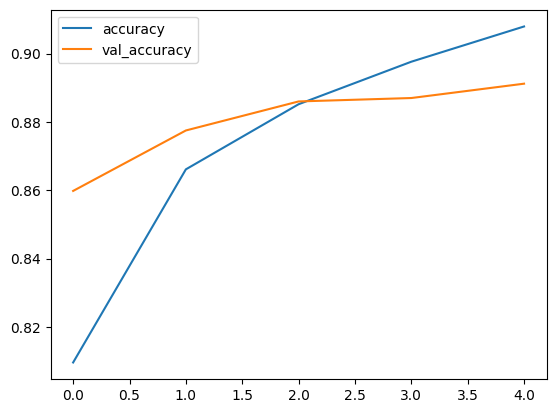

In [ ]:
# Plot accuracy per iteration


plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


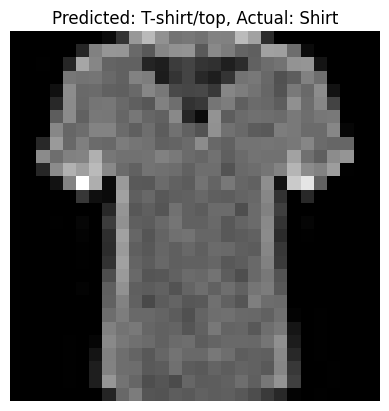

In [ ]:
# View Misinterpreted Images

# Find a random misclassified image
while True:
    index = random.randint(0, len(x_test) - 1)
    image = x_test[index]

    pred = model.predict(np.expand_dims(image, axis=0))  # Add batch dimension
    pred_label = np.argmax(pred)  # Get the predicted class index
    actual_label = y_test[index]  # Get the true label

    if pred_label != actual_label:  # Stop if misclassified
        break

# Show misclassified image
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Predicted: {labels[pred_label]}, Actual: {labels[actual_label]}")
plt.axis("off")
plt.show()

TF Models are pretty general
- By changing dataset and a few parameters, can classify different things like numbers
- Model architecture often stays the same

Assignment
- Change dataset to a Kaggle dataset of your choice (like flower dataset)
- Download model (using pickle) and reload/use it
- Configure for user input (hard for images though)